In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\prana\Downloads\Python data science\Untitled Folder\Time Series\ARIMA-And-Seasonal-ARIMA-master\perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [5]:
df.shape

(107, 2)

In [6]:
## Drop last 2 rows
df.drop(106,axis=0,inplace=True)

In [7]:
df.drop(105,axis=0,inplace=True)

In [8]:
# Convert Month into Datetime
df['Month']=pd.to_datetime(df['Month'])

In [9]:
df.set_index('Month',inplace=True)

In [10]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


<AxesSubplot:xlabel='Month'>

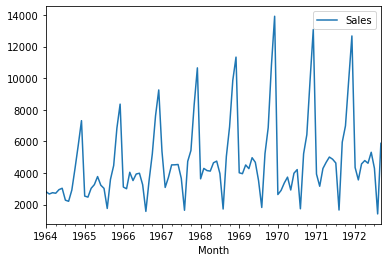

In [11]:
df.plot()

In [12]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [13]:
test_result=adfuller(df['Sales'])

In [14]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276248
p-value : 0.363915771660244
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Differencing

In [16]:
df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)

In [17]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [18]:
df.head(5)

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN


In [19]:
df.shape

(105, 3)

In [20]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213163
p-value : 2.060579696813685e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='Month'>

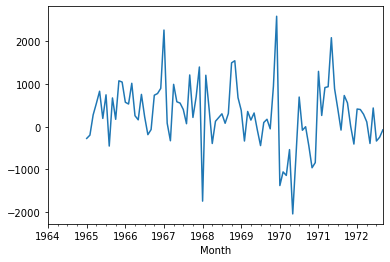

In [21]:
df['Seasonal First Difference'].plot()

In [22]:
#from pandas.tools.plotting import autocorrelation_plot
#autocorrelation_plot(df['Sales'])
#plt.show()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


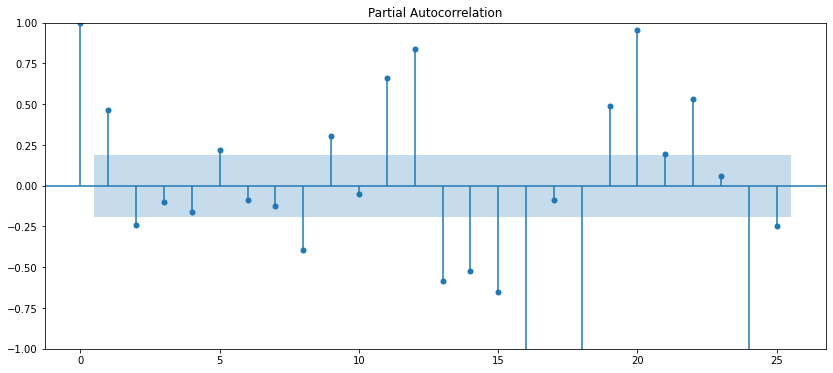

In [24]:
N, M = 14, 6
fig, ax = plt.subplots(figsize=(N, M))
plot_pacf(df['Sales'], lags = 25,ax=ax)
plt.show()

In [25]:
import statsmodels.api as sm

In [26]:
df.iloc[:90]

,Sales,Sales First Difference,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
...,...,...,...
1971-02-01,3162.0,-772.0,263.0
1971-03-01,4286.0,1124.0,916.0
1971-04-01,4676.0,390.0,936.0


In [27]:
train=df.iloc[:90]
test=df.iloc[90:]

In [28]:
model=sm.tsa.statespace.SARIMAX(train['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


<AxesSubplot:xlabel='Month'>

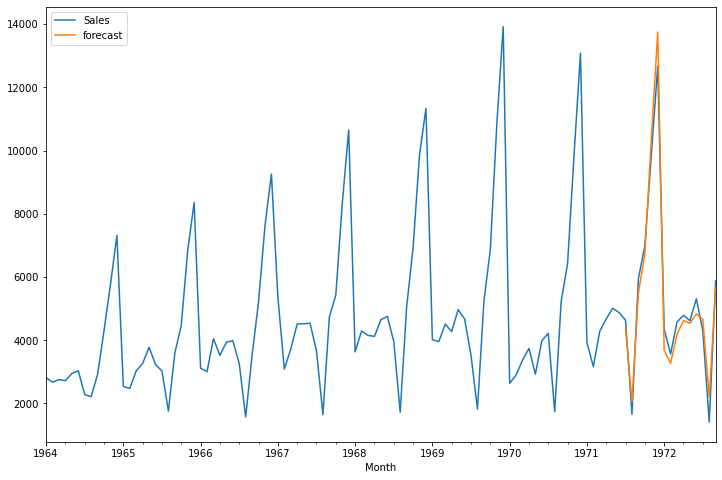

In [29]:
df['forecast']=results.predict(start=90,end=105,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [30]:
df1=df.dropna()

In [31]:
from math import sqrt
from sklearn.metrics import mean_squared_error
df1=df.dropna()
rmse = sqrt(mean_squared_error(df1['Sales'],df1['forecast']))
print('RMSE: %.3f' % rmse)


RMSE: 493.578


In [32]:
from sklearn.metrics import r2_score
r2_score(df1['Sales'], df1['forecast'],multioutput='variance_weighted')

0.9678102801365775

In [33]:
df1

,Sales,Sales First Difference,Seasonal First Difference,forecast
Month,,,,
1971-07-01,4633.0,-241.0,416.0,4387.098086
1971-08-01,1659.0,-2974.0,-79.0,2050.484432
1971-09-01,5951.0,4292.0,730.0,5495.402291
1971-10-01,6981.0,1030.0,557.0,6725.879990
1971-11-01,9851.0,2870.0,9.0,10363.171810
1971-12-01,12670.0,2819.0,-406.0,13748.036651
1972-01-01,4348.0,-8322.0,414.0,3685.617614
1972-02-01,3564.0,-784.0,402.0,3266.229580
1972-03-01,4577.0,1013.0,291.0,4190.834001


In [34]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [35]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [36]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [37]:
future_df=pd.concat([df,future_datest_df])

C:\Users\prana\anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


<AxesSubplot:>

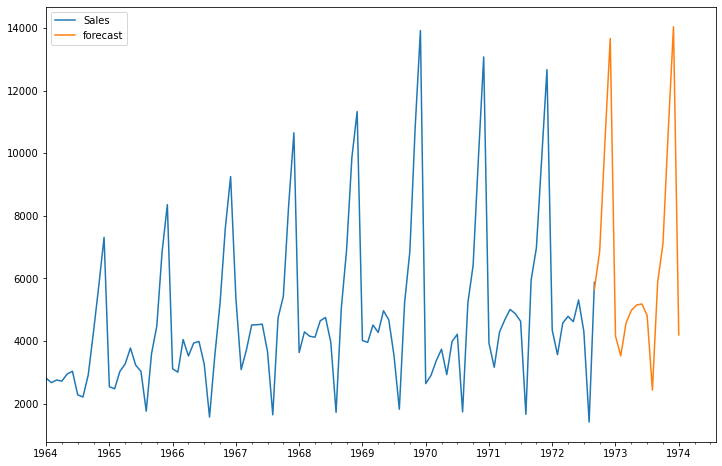

In [38]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 

# LSTM

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [40]:
train_1=train.drop(['Sales First Difference','Seasonal First Difference'],axis=1)

In [41]:
test_1=test.drop(['Sales First Difference','Seasonal First Difference'],axis=1)

In [42]:
scaled_train=scaler.fit_transform(train_1)
scaled_test=scaler.transform(test_1)

In [43]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [44]:
## Define generator
n_input=12
n_features=1
generator=TimeseriesGenerator(scaled_train,scaled_train,length=n_input,batch_size=1)



In [45]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [46]:
model=Sequential()
model.add(LSTM(100,activation='relu',input_shape=(n_input,n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [47]:
model.fit(generator,epochs=20)

Epoch 1/20
78/78 [==============================] - 1s 2ms/step - loss: 0.0519
Epoch 2/20
78/78 [==============================] - 0s 5ms/step - loss: 0.0441
Epoch 3/20
78/78 [==============================] - 0s 5ms/step - loss: 0.0408
Epoch 4/20
78/78 [==============================] - 0s 5ms/step - loss: 0.0322
Epoch 5/20
78/78 [==============================] - 0s 3ms/step - loss: 0.0330
Epoch 6/20
78/78 [==============================] - 0s 5ms/step - loss: 0.0314
Epoch 7/20
78/78 [==============================] - 0s 5ms/step - loss: 0.0328
Epoch 8/20
78/78 [==============================] - 0s 5ms/step - loss: 0.0196
Epoch 9/20
78/78 [==============================] - 0s 5ms/step - loss: 0.0127
Epoch 10/20
78/78 [==============================] - 0s 5ms/step - loss: 0.0198
Epoch 11/20
78/78 [==============================] - 0s 5ms/step - loss: 0.0113
Epoch 12/20
78/78 [==============================] - 0s 5ms/step - loss: 0.0128
Epoch 13/20
78/78 [==============================

In [48]:
loss_per_epoch=model.history.history['loss']

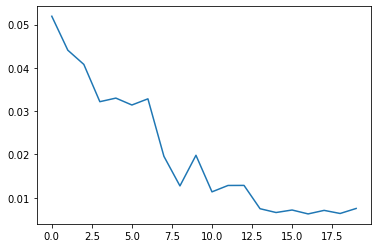

In [49]:
plt.plot(loss_per_epoch)

In [50]:
test_predictions=[]
first_batch=scaled_train[-n_input:]
current_batch=first_batch.reshape(1,12,1)
for i in range(len(test)):
    current_pred=model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [51]:
test_1['Prediction_Lstm']=scaler.inverse_transform(test_predictions)

In [52]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test_1['Sales'],test_1['Prediction_Lstm']))
print('RMSE: %.3f' % rmse)


RMSE: 1417.887


<AxesSubplot:xlabel='Month'>

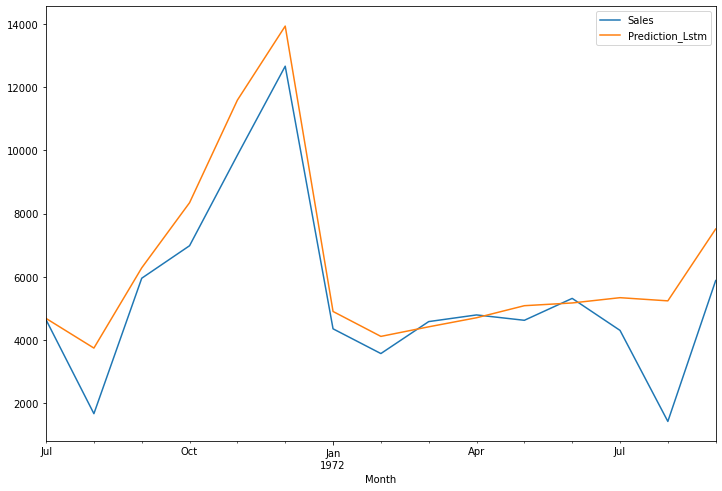

In [53]:
test_1.plot(figsize=(12,8))

In [54]:
from sklearn.metrics import r2_score
r2_score(test_1['Sales'], test_1['Prediction_Lstm'],multioutput='variance_weighted')

0.7343628805665658